# 1. Business Framing & Project overview

## Background

Indonesia’s transportation sector, including automotive 
industry, has been the highest final energy consumer, contribute 27% of total energy use & become primary source of CO2 emissions in the 
road transportation sector. 

As carbon emissions and reliance on fossil energy have become important concerns in Indonesia, developing electric vehicles is considered a 
possible solution due to their energy efficiency.

The project's key contribution is its approach to 
segmenting the battery electric vehicle market using different 
groups of consumer profiles.

## Dataset source information

Dataset source from my own personal survey for academic purpose.

## Objective

This project is try to answer below business question:

1.   What is the segmentation and characteristic of Indonesian battery electric vehicles?
2.   What is the most suitable battery electric vehicle basic product concept for each segmented market?

# 2. Data understanding

## Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

## Load Data

In [2]:
data = pd.read_csv('EV_survey.csv')

## Sample of data

In [3]:
# Showing top 5 rows of the data
data.head()

,Respondent ID,Gender,Age Range (Years),Domicile,Marital Status,Education,Occupation,Spending in a year,Vehicle Purchase Price,Vehicle Model,Battery Charging Time,Driving Range
0,Respondent 1,Male,25-40,West Java,Unmarried,High School,Student,200-250 M IDR,300-400 M IDR,City Car,3 hours,350 Km
1,Respondent 2,Male,25-40,West Java,Unmarried,High School,Student,< 200 M IDR,300-400 M IDR,City Car,3 hours,350 Km
2,Respondent 3,Female,25-40,West Java,Unmarried,High School,Student,200-250 M IDR,300-400 M IDR,City Car,3 hours,350 Km
3,Respondent 4,Male,25-40,West Java,Unmarried,High School,Student,200-250 M IDR,300-400 M IDR,City Car,5 hours,250 Km
4,Respondent 5,Female,25-40,West Java,Unmarried,High School,Student,200-250 M IDR,400-500 M IDR,City Car,3 hours,350 Km


In [4]:
# sample 5 rows of the data
# the results change everytime the code is executed (random sample)
data.sample(5)

,Respondent ID,Gender,Age Range (Years),Domicile,Marital Status,Education,Occupation,Spending in a year,Vehicle Purchase Price,Vehicle Model,Battery Charging Time,Driving Range
390,Respondent 391,Male,18-24,Jakarta surround area,Married,Bachelor,Self-employed,above 350 M IDR,300-400 M IDR,MPV,3 hours,350 Km
97,Respondent 98,Male,above 40,West Java,Married,Bachelor,Private Employee,< 200 M IDR,300-400 M IDR,MPV,3 hours,300 Km
103,Respondent 104,Male,25-40,West Java,Married,Bachelor,Private Employee,< 200 M IDR,300-400 M IDR,MPV,3 hours,300 Km
246,Respondent 247,Male,above 40,West Java,Unmarried,Bachelor,Student,< 200 M IDR,300-400 M IDR,SUV,3 hours,350 Km
270,Respondent 271,Male,18-24,West Java,Married,Bachelor,Private Employee,< 200 M IDR,300-400 M IDR,City Car,3 hours,250 Km


Feature information:

*   `Respondent ID`: Index of each Respondent.
*   `Gender`: Gender of each respondent, there are Male & Female.
*   `Age Range (Years)`: Age range of respondent, Divided into 3 category: Gen Z (18-24), Millenials (25-40), Boomers (above 40)
*   `Domicile`: City or Region of each respondent in Indonesia area. There are : West Java, Jakarta surround area, East Indonesia, Sumatera, Borneo & Center & East Java
*   `Marital Status`: Status of marriage, Married or Unmarried.
*   `Education`: Education level from each respondent divided into 3 category: High School, Bachelor & master/Phd.
*   `Occupation`: Profession of each respondent, There are: Private Employee, Student, Self-employed, Government Employees, Housewife, Teacher/Lecturer, Retired & Others.
*   `Spending in a year`: Number of spending in a year indicates purchases power, there are: <200 M IDR, 200-250 M IDR, 250-300 M IDR, 300-350 M IDR & above 350 M IDR.
*   `Vehicle Purchase Price`: Purchase price range of Electric Vehicle that would be pay by respondent, there are 300-400 M IDR, 400-500 M IDR & above 500 M IDR.
*   `Vehicle Model`: Type of favorable electric car model, There are: City Car, MPV, SUV & Sedan 
*   `Battery Charging Time`: Total time of charging Electric car battery for 100 Km. There 3 hours, 5 hours & 8 hours.
*  `Driving Range`: Total maximum lentgh of driving in Km, divided into 250 Km, 300 Km, 350 Km.

## General Information & Missing Values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Respondent ID            422 non-null    object
 1   Gender                   421 non-null    object
 2   Age Range (Years)        421 non-null    object
 3   Domicile                 421 non-null    object
 4   Marital Status           418 non-null    object
 5   Education                419 non-null    object
 6   Occupation               419 non-null    object
 7   Spending in a year       421 non-null    object
 8   Vehicle Purchase Price   421 non-null    object
 9   Vehicle Model            421 non-null    object
 10  Battery Charging Time    422 non-null    object
 11  Driving Range            422 non-null    object
dtypes: object(12)
memory usage: 39.7+ KB


Observation:
1. Data contains 12 columns with 422 rows.
2. Several columns have missing values, will handle later.
3. All dtypes is categorical.

In [6]:
# number of missing values per column
data.isna().sum()

Respondent ID              0
Gender                     1
Age Range (Years)          1
Domicile                   1
Marital Status             4
Education                  3
Occupation                 3
Spending in a year         1
Vehicle Purchase Price     1
Vehicle Model              1
Battery Charging Time      0
Driving Range              0
dtype: int64

In [7]:
# percentage version
data.isna().sum() * 100 / len(data)

Respondent ID              0.000000
Gender                     0.236967
Age Range (Years)          0.236967
Domicile                   0.236967
Marital Status             0.947867
Education                  0.710900
Occupation                 0.710900
Spending in a year         0.236967
Vehicle Purchase Price     0.236967
Vehicle Model              0.236967
Battery Charging Time      0.000000
Driving Range              0.000000
dtype: float64

Since number of rows with missing values are small in proportion (< 5%), we can simply drop them.

In [8]:
# drop na values
data = data.dropna()

In [9]:
# sanity check
data.isna().sum()

Respondent ID              0
Gender                     0
Age Range (Years)          0
Domicile                   0
Marital Status             0
Education                  0
Occupation                 0
Spending in a year         0
Vehicle Purchase Price     0
Vehicle Model              0
Battery Charging Time      0
Driving Range              0
dtype: int64

Success removing NULL values! :)

## Duplicated data check

In [10]:
# number of duplicated data
data.duplicated().sum()

0

Data don't have any duplicate row as well!!

## Drop irrelevant feature

Feature irrelevant:

*  `Respondent ID`: just give index information

In [11]:
data.drop(['Respondent ID'], axis=1, inplace=True)

In [12]:
data.sample(10)

,Gender,Age Range (Years),Domicile,Marital Status,Education,Occupation,Spending in a year,Vehicle Purchase Price,Vehicle Model,Battery Charging Time,Driving Range
291,Female,18-24,Borneo,Married,Bachelor,Private Employee,< 200 M IDR,300-400 M IDR,City Car,3 hours,350 Km
65,Female,above 40,Jakarta surround area,Married,Bachelor,Private Employee,< 200 M IDR,300-400 M IDR,City Car,5 hours,350 Km
60,Female,25-40,West Java,Married,Bachelor,Private Employee,< 200 M IDR,300-400 M IDR,City Car,3 hours,350 Km
357,Male,18-24,East Indonesia,Married,Bachelor,Self-employed,300-350 M IDR,above 500 M IDR,Sedan,3 hours,350 Km
262,Male,25-40,Jakarta surround area,Unmarried,Bachelor,Student,< 200 M IDR,300-400 M IDR,MPV,3 hours,300 Km
329,Female,18-24,Sumatera,Unmarried,Bachelor,Student,300-350 M IDR,300-400 M IDR,City Car,3 hours,350 Km
342,Female,18-24,East Indonesia,Married,Bachelor,Self-employed,< 200 M IDR,300-400 M IDR,City Car,3 hours,350 Km
46,Male,25-40,West Java,Married,Bachelor,Housewife,< 200 M IDR,300-400 M IDR,City Car,3 hours,300 Km
282,Female,25-40,Jakarta surround area,Married,Bachelor,Private Employee,300-350 M IDR,above 500 M IDR,SUV,3 hours,250 Km
234,Female,25-40,Center & East Java,Unmarried,Bachelor,Student,< 200 M IDR,300-400 M IDR,MPV,3 hours,250 Km


In [13]:
data.columns

Index(['Gender', 'Age Range (Years)', 'Domicile', 'Marital Status',
       'Education', 'Occupation', 'Spending in a year',
       'Vehicle Purchase Price ', 'Vehicle Model', 'Battery Charging Time',
       'Driving Range '],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   417 non-null    object
 1   Age Range (Years)        417 non-null    object
 2   Domicile                 417 non-null    object
 3   Marital Status           417 non-null    object
 4   Education                417 non-null    object
 5   Occupation               417 non-null    object
 6   Spending in a year       417 non-null    object
 7   Vehicle Purchase Price   417 non-null    object
 8   Vehicle Model            417 non-null    object
 9   Battery Charging Time    417 non-null    object
 10  Driving Range            417 non-null    object
dtypes: object(11)
memory usage: 39.1+ KB


## Statistical summary

In [15]:
# describe method on dataset
data.describe().T

,count,unique,top,freq
Gender,417,2,Female,216
Age Range (Years),417,3,25-40,254
Domicile,417,6,West Java,157
Marital Status,417,2,Married,293
Education,417,3,Bachelor,378
Occupation,417,8,Private Employee,188
Spending in a year,417,5,< 200 M IDR,229
Vehicle Purchase Price,417,3,300-400 M IDR,342
Vehicle Model,417,4,City Car,167
Battery Charging Time,417,3,3 hours,276


In [16]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in data:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of Gender column
Female    216
Male      201
Name: Gender, dtype: int64 

Value counts of Age Range (Years) column
25-40         254
18-24         106
above 40       57
Name: Age Range (Years), dtype: int64 

Value counts of Domicile column
West Java                157
Jakarta surround area    139
East Indonesia            42
Sumatera                  33
Borneo                    24
Center & East Java        22
Name: Domicile, dtype: int64 

Value counts of Marital Status column
Married      293
Unmarried    124
Name: Marital Status, dtype: int64 

Value counts of Education column
Bachelor             378
Magister/Doctoral     21
High School           18
Name: Education, dtype: int64 

Value counts of Occupation column
Private Employee        188
Student                  89
Self-employed            42
Government Employees     30
Housewife                29
Teacher/Lecturer         16
Others                   16
Retired                   7
Name: Occupation, dtype: int64 

V

# 3. Perform Exploratory Data Analysis

## Univariat Analysis

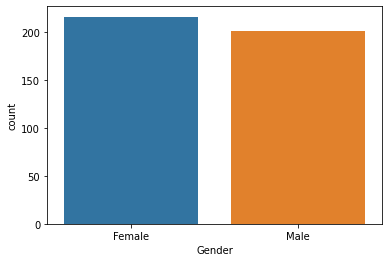

In [17]:
# count plot on Gender feature
sns.countplot(data['Gender'], order=data['Gender'].value_counts(ascending=False).index)

 
# Show the plot
plt.show()

Observation:
From above Barplot show that Female 216, Male 201, it's quite balance & representative enough to do further analysis.

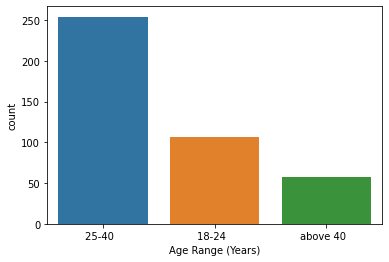

In [18]:
# count plot on Age Range (Years) feature
sns.countplot(data['Age Range (Years)'], order=data['Age Range (Years)'].value_counts(ascending=False).index)
 
# Show the plot
plt.show()

Observation:
Generation distribution of these respondent survey are, Millenials (25-40 yo) 254 peoples, Gen-Z (18-24 yo) 106 peoples, & Babyboomers (above 40 yo) 57 peoples.

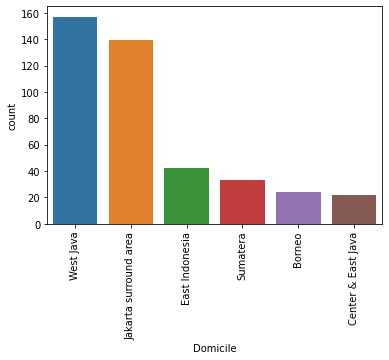

In [19]:
# count plot on Domicile feature
sns.countplot(data['Domicile'], order=data['Domicile'].value_counts(ascending=False).index)
plt.xticks(rotation=90)
 
# Show the plot
plt.show()

Observation: Domicile respondent berakdown West Java 157 peoples, Jakarta surround area 139 peoples, East Indonesia 42 peoples, Sumatera 33 peoples, Borneo 24 peoples, Center & East Java 22 peoples

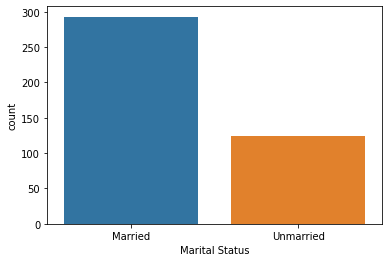

In [20]:
# count plot on Marital Status feature
sns.countplot(data['Marital Status'], order=data['Marital Status'].value_counts(ascending=False).index)

 
# Show the plot
plt.show()

Observation:
From above Barplot show that Married 293, Unmarried 124, Married respondent dominated this survey.

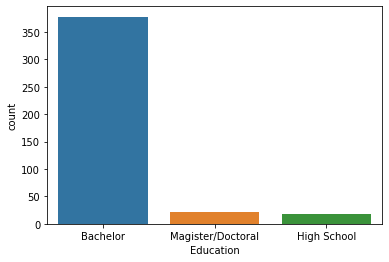

In [21]:
# count plot on Education feature
sns.countplot(data['Education'], order=data['Education'].value_counts(ascending=False).index)

 
# Show the plot
plt.show()

Observation:
Education level of respondent dominated by Bachelor 378 peoples, Magister/Doctoral 21 peoples & High School 18 peoples.

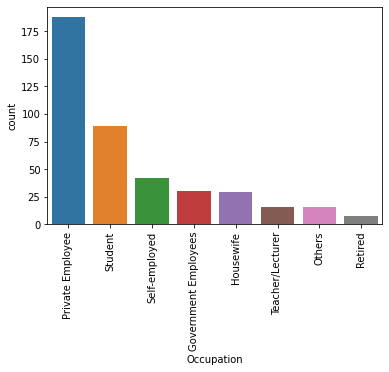

In [22]:
# count plot on Occupation feature
sns.countplot(data['Occupation'], order=data['Occupation'].value_counts(ascending=False).index)
plt.xticks(rotation=90)

 
# Show the plot
plt.show()

Observation:
Profession of respondent dominated by Private Employee 188 peoples,
Student 89 peoples, Self-employed 42 peoples, Government Employees 30 peoples, Housewife 29 peoples, Teacher/Lecturer 16 peoples, Retired 7 peoples & Others 16 

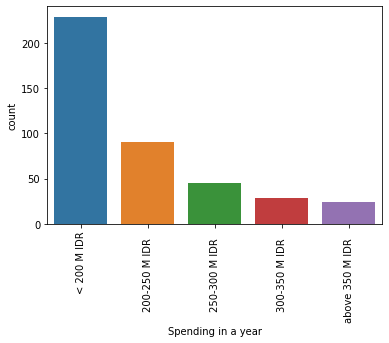

In [23]:
# count plot on Spending in a year feature
sns.countplot(data['Spending in a year'], order=data['Spending in a year'].value_counts(ascending=False).index)
plt.xticks(rotation=90)

 
# Show the plot
plt.show()

Observation: 
Yearly spending of each respondent from survey show that < 200 M IDR 229 peoples, 200-250 M IDR 90 peoples, 250-300 M IDR 45 peoples, 300-350 M IDR 29 peoples, above 350 M IDR 24 peoples.

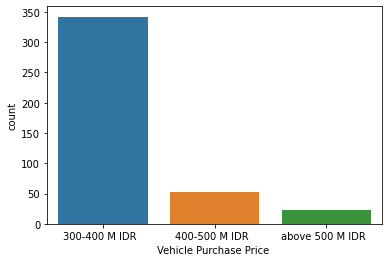

In [24]:
# count plot on Vehicle Purchase Price feature
sns.countplot(data['Vehicle Purchase Price '], order=data['Vehicle Purchase Price '].value_counts(ascending=False).index)


 
# Show the plot
plt.show()

Observation: 
Vehicle Purchase that respondent desirable are 300-400 M IDR 342 peoples, 400-500 M IDR 52 peoples & above 500 M IDR 23 peoples.

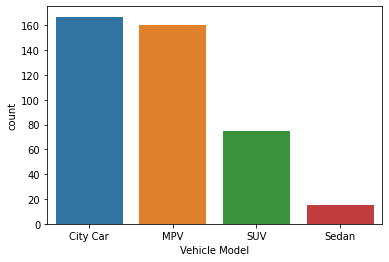

In [25]:
# count plot on Vehicle Model feature
sns.countplot(data['Vehicle Model'], order=data['Vehicle Model'].value_counts(ascending=False).index)

 
# Show the plot
plt.show()

Observation: 
Favorable car type fromrespondent are City Car 167 peoples, MPV 160 peoples, SUV 75 peoples & Sedan 15 peoples

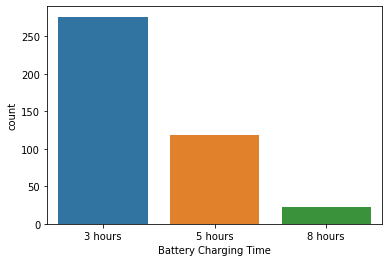

In [26]:
# count plot on Battery Charging Timel feature
sns.countplot(data['Battery Charging Time'], order=data['Battery Charging Time'].value_counts(ascending=False).index)

 
# Show the plot
plt.show()

Observation: 
Battery Charging time desriable by respondent are 3 hours 276 peoples, 5 hours 119 peoples & 8 hours 22 peoples

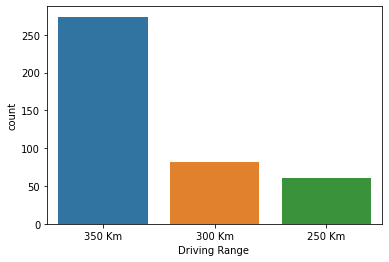

In [27]:
# count plot on Driving Range Time feature
sns.countplot(data['Driving Range '], order=data['Driving Range '].value_counts(ascending=False).index)

 
# Show the plot
plt.show()

Observation:
Driving Range desriable by respondent are 350 Km 274 peoples, 300 Km 82 peoples & 250 Km 61 peoples.

## Multivariate Analysis

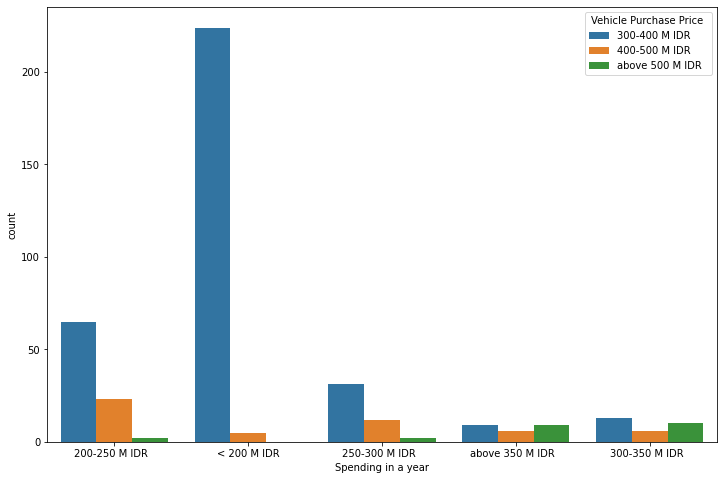

In [77]:
# adjust the figure size for better readability
plt.figure(figsize=(12,8))

# Spending with Vehicle Purchase relation
sns.countplot(data=data,
            hue='Vehicle Purchase Price ',
            x='Spending in a year')

Observation:
Respondent with Spending < 200 M IDR up to 300 M IDR consider to buy electric vehicle with price 300-400 M IDR. While Respondent with Spending 300 - above 350 M IDR consider Electric Vehicle with price above 500 M IDR.

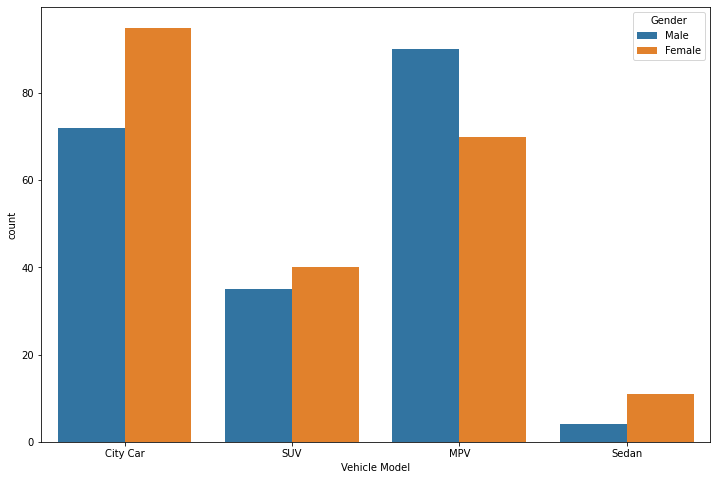

In [28]:
# adjust the figure size for better readability
plt.figure(figsize=(12,8))

# Gender with Vehicle model relation

feat = 'Vehicle Model'
hue = 'Gender'
hue_type = data[hue].dtype.type

groups = data[feat].unique()
proportions = data.groupby(feat)[hue].value_counts(normalize=True)

ax = sns.countplot(x=feat, hue=hue, data=data)

for c in ax.containers:
    labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]

Observation:
Female favorable City Car, SUV & Sedan. While Male desirable MPV type.

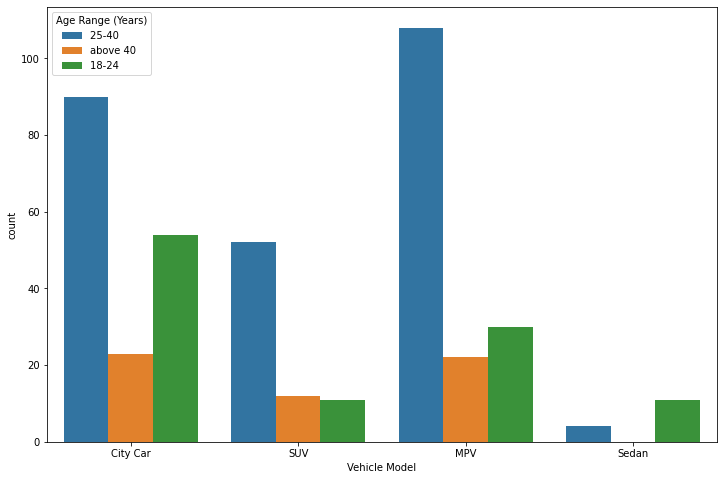

In [29]:
# adjust the figure size for better readability
plt.figure(figsize=(12,8))

# Age Range with Vehicle Model relation
sns.countplot(data=data,
            hue='Age Range (Years)',
            x='Vehicle Model')

Observation:
Millenials favorable MPV, City car, Gen-z love City car & Babyboomers love MPV & City Car.

In [30]:
data.groupby(['Battery Charging Time','Driving Range ']).agg(distinct_name = ('Vehicle Model','nunique'))

distinct_name
Battery Charging Time Driving Range                
3 hours               250 Km                      4
                      300 Km                      4
                      350 Km                      4
5 hours               250 Km                      3
                      300 Km                      3
                      350 Km                      4
8 hours               300 Km                      1
                      350 Km                      4

Observation:
Only Electric Vehicle with 8 hours Charging time doesn't have 250 Km driving range combination choosed by respondent

In [31]:
data.groupby(['Vehicle Model','Driving Range ']).agg(distinct_name = ('Battery Charging Time','nunique'))

distinct_name
Vehicle Model Driving Range                
City Car      250 Km                      2
              300 Km                      2
              350 Km                      3
MPV           250 Km                      2
              300 Km                      2
              350 Km                      3
SUV           250 Km                      2
              300 Km                      3
              350 Km                      3
Sedan         250 Km                      1
              300 Km                      1
              350 Km                      3

Observation:
Sedan type have less combination of Driving Range & Battery Cahrging time tahn any type of cars.

# 4. Clustering model (K-modes)

## Create data copy

In [32]:
data_copy = data.copy()

## Data preparation

In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.head()

,Gender,Age Range (Years),Domicile,Marital Status,Education,Occupation,Spending in a year,Vehicle Purchase Price,Vehicle Model,Battery Charging Time,Driving Range
0,1,1,5,1,1,6,0,0,0,0,2
1,1,1,5,1,1,6,3,0,0,0,2
2,0,1,5,1,1,6,0,0,0,0,2
3,1,1,5,1,1,6,0,0,0,1,0
4,0,1,5,1,1,6,0,1,0,0,2


In [34]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
# Importing Libraries
from kmodes.kmodes import KModes

## Using K-Mode with "Cao" initialization

In [36]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 35, cost: 1630.0
Run 1, iteration: 2/100, moves: 11, cost: 1630.0


In [70]:
# Predicted Clusters
fitClusters_cao

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 1,
       0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = data.columns

In [39]:
# Mode of the clusters
clusterCentroidsDf

,Gender,Age Range (Years),Domicile,Marital Status,Education,Occupation,Spending in a year,Vehicle Purchase Price,Vehicle Model,Battery Charging Time,Driving Range
0,0,1,5,0,0,3,3,0,0,0,2
1,1,1,3,1,0,6,0,0,1,0,2


## Using K-Mode with "Huang" initialization

In [40]:
km_huang = KModes(n_clusters=3, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 29, cost: 1550.0


In [71]:
# Predicted clusters
fitClusters_huang

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Choosing K by comparing Cost against each K

In [72]:
cost = []
for num_clusters in list(range(1,6)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2229.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 35, cost: 2045.0
Run 1, iteration: 2/100, moves: 11, cost: 2045.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 79, cost: 1908.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 99, cost: 1820.0
Run 1, iteration: 2/100, moves: 4, cost: 1819.0
Run 1, iteration: 3/100, moves: 0, cost: 1819.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 107, cost: 1761.0
Run 1, iteration: 2/100, moves: 23, cost: 1748.0
Run 1, iteration: 3/100, moves: 1, cost: 1747.0
Run 1, iteration: 4/100, moves: 0, cost: 1747.0


## Elbow Method

Text(0.5, 1.0, 'Elbow Methdod to Check Number of Cluster')

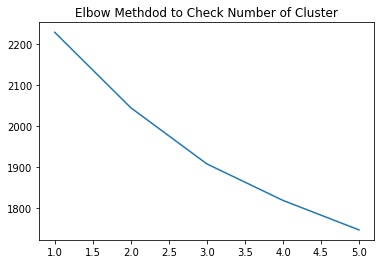

In [73]:
y = np.array([i for i in range(1,6,1)])
plt.plot(y,cost)
plt.title('Elbow Methdod to Check Number of Cluster')

the line starts to lowering slope at k=3

## Choosing K=3

In [44]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 46, cost: 1550.0
Run 1, iteration: 2/100, moves: 20, cost: 1529.0
Run 1, iteration: 3/100, moves: 14, cost: 1529.0


In [45]:
fitClusters_cao

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 1,
       0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Combining the predicted clusters with the original DF.

In [46]:
data = data_copy.reset_index()

In [47]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [48]:
combinedDf['cluster_predicted'] = combinedDf['cluster_predicted'].map({0:'First', 1:'Second', 2:'Third'})
combinedDf.head()

,Gender,Age Range (Years),Domicile,Marital Status,Education,Occupation,Spending in a year,Vehicle Purchase Price,Vehicle Model,Battery Charging Time,Driving Range,cluster_predicted
0,Male,25-40,West Java,Unmarried,High School,Student,200-250 M IDR,300-400 M IDR,City Car,3 hours,350 Km,First
1,Male,25-40,West Java,Unmarried,High School,Student,< 200 M IDR,300-400 M IDR,City Car,3 hours,350 Km,First
2,Female,25-40,West Java,Unmarried,High School,Student,200-250 M IDR,300-400 M IDR,City Car,3 hours,350 Km,First
3,Male,25-40,West Java,Unmarried,High School,Student,200-250 M IDR,300-400 M IDR,City Car,5 hours,250 Km,First
4,Female,25-40,West Java,Unmarried,High School,Student,200-250 M IDR,400-500 M IDR,City Car,3 hours,350 Km,First


In [49]:
combinedDf.sample(10)

,Gender,Age Range (Years),Domicile,Marital Status,Education,Occupation,Spending in a year,Vehicle Purchase Price,Vehicle Model,Battery Charging Time,Driving Range,cluster_predicted
26,Male,above 40,Jakarta surround area,Unmarried,Bachelor,Student,< 200 M IDR,300-400 M IDR,City Car,5 hours,350 Km,Second
413,Male,25-40,Jakarta surround area,Married,Magister/Doctoral,Self-employed,200-250 M IDR,300-400 M IDR,City Car,3 hours,350 Km,First
61,Female,25-40,West Java,Married,Bachelor,Housewife,200-250 M IDR,300-400 M IDR,City Car,3 hours,300 Km,First
138,Male,25-40,Jakarta surround area,Married,Bachelor,Private Employee,200-250 M IDR,300-400 M IDR,MPV,3 hours,350 Km,Third
237,Female,25-40,Jakarta surround area,Unmarried,Bachelor,Student,< 200 M IDR,300-400 M IDR,MPV,3 hours,300 Km,Second
265,Female,25-40,West Java,Married,Bachelor,Private Employee,< 200 M IDR,300-400 M IDR,MPV,3 hours,350 Km,First
229,Female,25-40,West Java,Unmarried,High School,Student,< 200 M IDR,300-400 M IDR,City Car,3 hours,350 Km,First
103,Male,25-40,West Java,Married,Bachelor,Private Employee,< 200 M IDR,300-400 M IDR,MPV,3 hours,300 Km,First
117,Female,25-40,Jakarta surround area,Married,Bachelor,Private Employee,< 200 M IDR,300-400 M IDR,City Car,3 hours,250 Km,First
327,Female,18-24,East Indonesia,Unmarried,Bachelor,Student,250-300 M IDR,300-400 M IDR,City Car,3 hours,300 Km,Second


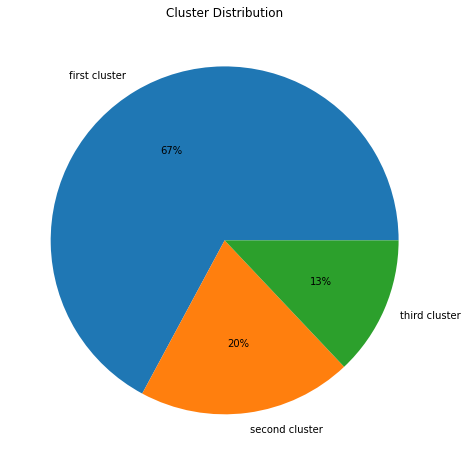

In [50]:
plt.figure(figsize = (8,8))
pie = combinedDf.groupby(['cluster_predicted']).size().to_frame().reset_index()
pie.rename(columns={0: 'count'}, inplace=True)

plt.title('Cluster Distribution')
pie_labels = ['first cluster', 'second cluster', 'third cluster']
plt.pie(pie['count'], labels=pie_labels,autopct='%.0f%%')
plt.show()

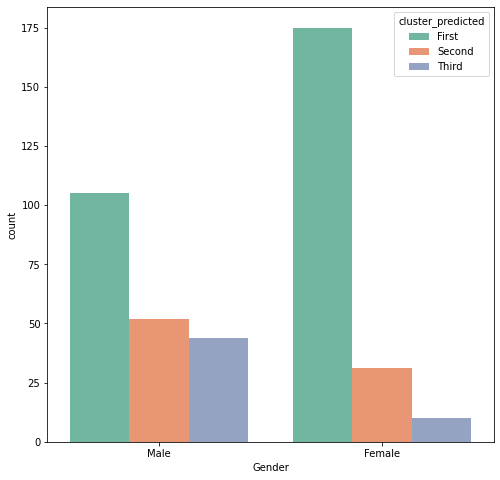

In [76]:
# Gender distribution for each Cluster/Segment
plt.figure(figsize = (8,8))
sns.countplot(data=combinedDf,
            hue='cluster_predicted',
            x='Gender',
            palette = "Set2",
            )

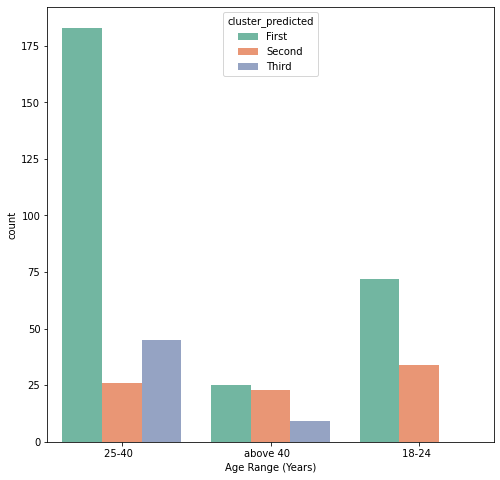

In [52]:
# Age Range (Years) distribution for each Cluster/Segment
plt.figure(figsize = (8,8))
sns.countplot(data=combinedDf,
            hue='cluster_predicted',
            x='Age Range (Years)',
            palette = "Set2"
            )

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

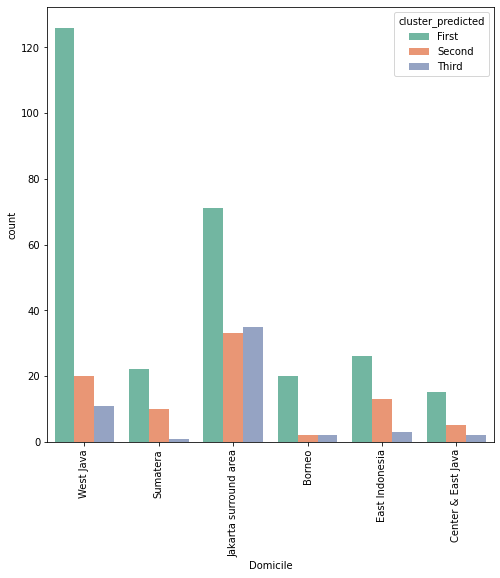

In [53]:
# Domicile distribution for each Cluster/Segment
plt.figure(figsize = (8,8))
sns.countplot(data=combinedDf,
            hue='cluster_predicted',
            x='Domicile',
            palette = "Set2"
            )
plt.xticks(rotation=90)

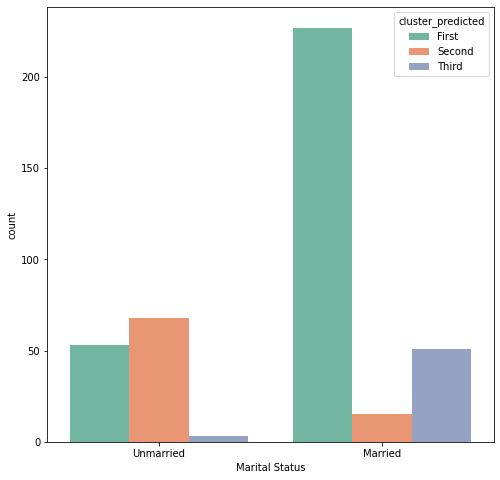

In [54]:
# Marital Status distribution for each Cluster/Segment
plt.figure(figsize = (8,8))
sns.countplot(data=combinedDf,
            hue='cluster_predicted',
            x='Marital Status',
            palette = "Set2"
            )

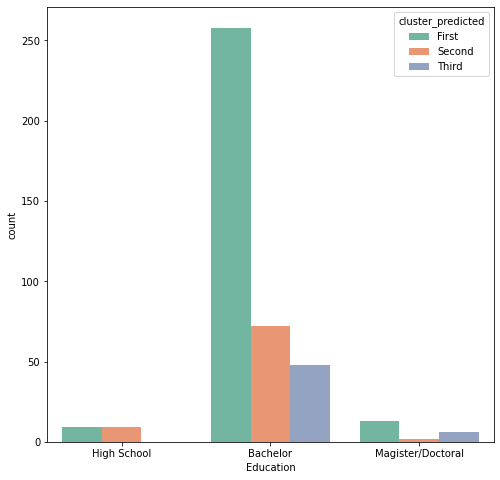

In [55]:
# Education distribution for each Cluster/Segment
plt.figure(figsize = (8,8))
sns.countplot(data=combinedDf,
            hue='cluster_predicted',
            x='Education',
            palette = "Set2"
            )

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

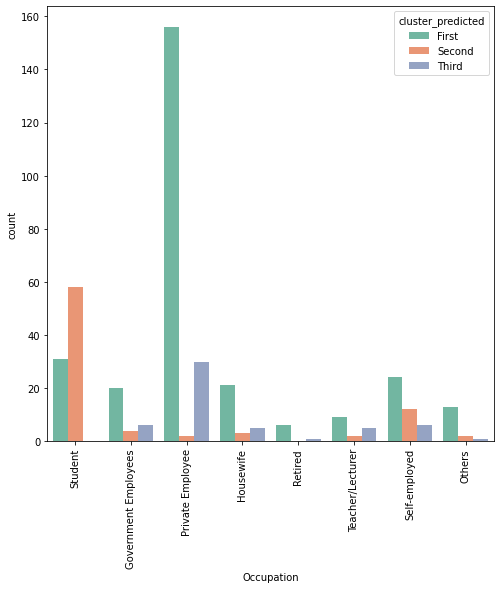

In [56]:
# Occupation distribution for each Cluster/Segment
plt.figure(figsize = (8,8))
sns.countplot(data=combinedDf,
            hue='cluster_predicted',
            x='Occupation',
            palette = "Set2"
            )
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

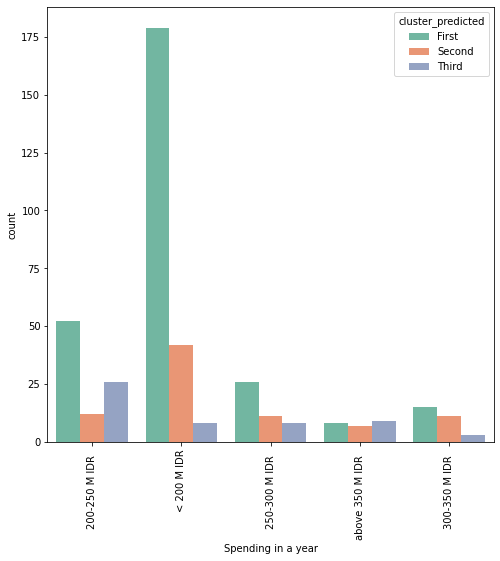

In [57]:
# Spending in a year distribution for each Cluster/Segment
plt.figure(figsize = (8,8))
sns.countplot(data=combinedDf,
            hue='cluster_predicted',
            x='Spending in a year',
            palette = "Set2"
            )
plt.xticks(rotation=90)

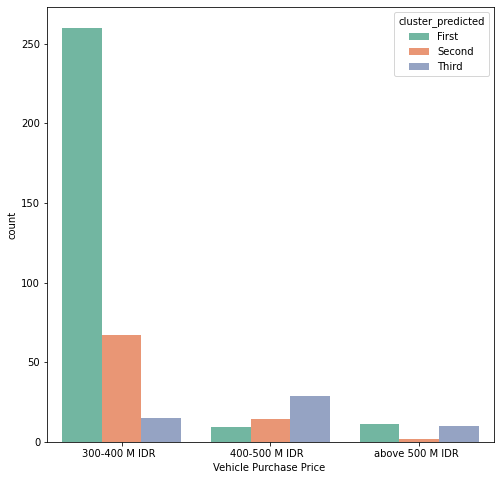

In [58]:
# Vehicle Purchase Price distribution for each Cluster/Segment
plt.figure(figsize = (8,8))
sns.countplot(data=combinedDf,
            hue='cluster_predicted',
            x='Vehicle Purchase Price ',
            palette = "Set2"
            )

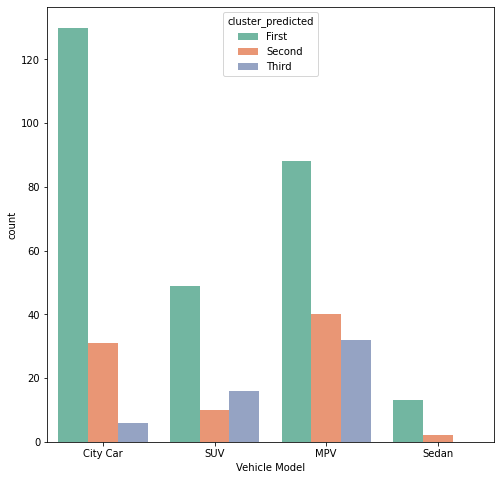

In [59]:
# Vehicle Model distribution for each Cluster/Segment
plt.figure(figsize = (8,8))
sns.countplot(data=combinedDf,
            hue='cluster_predicted',
            x='Vehicle Model',
            palette = "Set2"
            )

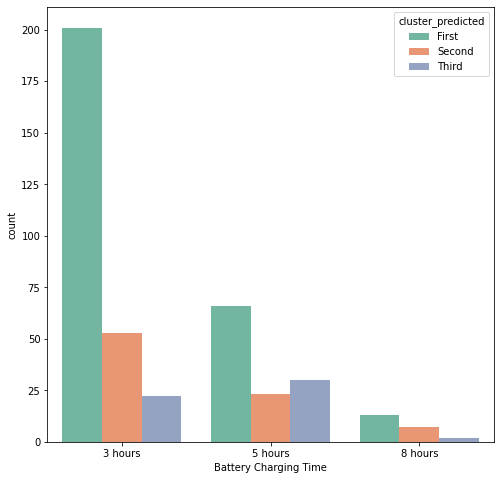

In [60]:
# Battery Charging Time distribution for each Cluster/Segment
plt.figure(figsize = (8,8))
sns.countplot(data=combinedDf,
            hue='cluster_predicted',
            x='Battery Charging Time',
            palette = "Set2"
            )

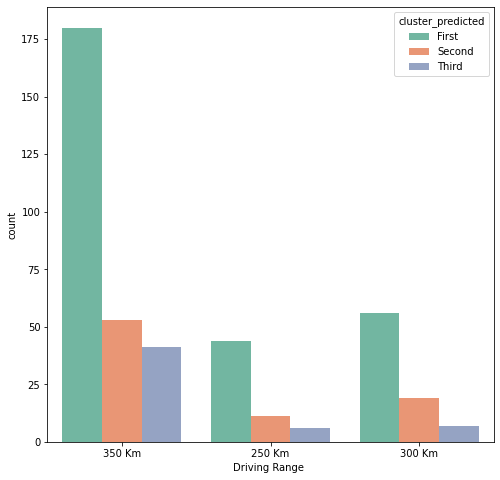

In [61]:
# Driving Range distribution for each Cluster/Segment
plt.figure(figsize = (8,8))
sns.countplot(data=combinedDf,
            hue='cluster_predicted',
            x='Driving Range ',
            palette = "Set2"
            )

# 5. Cluster/Segment Identification

## First Cluster - "Price Sensitive"

In [62]:
# First Cluster
First_Cluster = combinedDf[combinedDf['cluster_predicted'].isin(['First'])]
First_Cluster['cluster_predicted'].value_counts()

First    280
Name: cluster_predicted, dtype: int64

In [63]:
First_Cluster.describe().T

,count,unique,top,freq
Gender,280,2,Female,175
Age Range (Years),280,3,25-40,183
Domicile,280,6,West Java,126
Marital Status,280,2,Married,227
Education,280,3,Bachelor,258
Occupation,280,8,Private Employee,156
Spending in a year,280,5,< 200 M IDR,179
Vehicle Purchase Price,280,3,300-400 M IDR,260
Vehicle Model,280,4,City Car,130
Battery Charging Time,280,3,3 hours,201


Interpretation:
*   Cluster #1 is the biggest segment with 280 members or 
67% of total participants. This segment is a price-sensitive 
group that prioritizes purchasing price when choosing 
battery-electric vehicles and considers City Car vehicle model with 3 hrs charging time & 350 Km Driving Range.
*   This Cluster dominated by Female, Millenials (25-40 years old). Mostly live in West Java. Most of them are married with Bachelor as the last education & Private employee as their profession. They spend less than 200 million rupiahs/year.



## Second Cluster - "Value Seeker"

In [64]:
# Second Cluster
Second_Cluster = combinedDf[combinedDf['cluster_predicted'].isin(['Second'])]
Second_Cluster['cluster_predicted'].value_counts()

Second    83
Name: cluster_predicted, dtype: int64

In [65]:
Second_Cluster.describe().T

,count,unique,top,freq
Gender,83,2,Male,52
Age Range (Years),83,3,18-24,34
Domicile,83,6,Jakarta surround area,33
Marital Status,83,2,Unmarried,68
Education,83,3,Bachelor,72
Occupation,83,7,Student,58
Spending in a year,83,5,< 200 M IDR,42
Vehicle Purchase Price,83,3,300-400 M IDR,67
Vehicle Model,83,4,MPV,40
Battery Charging Time,83,3,3 hours,53


Interpretation:
*   Cluster #2 is second biggest segment with 83 members or 20% of total participants. This segment is a Value Seeker group that prioritizes purchasing price when choosing electric vehicles but still looking for affordable value in class and considers MPV vehicle model with 3 hrs charging time & 350 Km Driving Range.
*   This Cluster dominated by Male, gen-Z (18-24 years old). Mostly live in Jakarta surround area. Most of them are single with Bachelor as the last education & Student as their profession. They spend less than 200 million rupiahs/year.

## Third Cluster - "Premium"

In [66]:
# Third Cluster
Third_Cluster = combinedDf[combinedDf['cluster_predicted'].isin(['Third'])]
Third_Cluster['cluster_predicted'].value_counts()

Third    54
Name: cluster_predicted, dtype: int64

In [67]:
Third_Cluster.describe().T

,count,unique,top,freq
Gender,54,2,Male,44
Age Range (Years),54,2,25-40,45
Domicile,54,6,Jakarta surround area,35
Marital Status,54,2,Married,51
Education,54,2,Bachelor,48
Occupation,54,7,Private Employee,30
Spending in a year,54,5,200-250 M IDR,26
Vehicle Purchase Price,54,3,400-500 M IDR,29
Vehicle Model,54,3,MPV,32
Battery Charging Time,54,3,5 hours,30


Interpretation:
*   Cluster #3 is the last segment with 54 members or 13% of total participants. This segment is a Premium group that looking for best value in class when choosing electric vehicles,  they considers MPV vehicle model with 5 hrs charging time & 350 Km Driving Range.
*   This Cluster dominated by Male, Milenialls (25-40 years old). Mostly live in Jakarta surround area. Most of them are Married with Bachelor as the last education & Private employee as their profession. They spend between 200-250 million rupiahs/year.

# 6. Conclusion & Recommendation

## Conclusion

There are 3 cluster/segment of Electric vehicle indetified by this project:
*   Cluster #1 is the biggest segment with 280 members or 67% of total participants. This segment is a **Price-Sensitive group** that prioritizes purchasing price when choosing battery-electric vehicles. This Cluster dominated by Female, Millenials (25-40 years old). Mostly live in West Java. Most of them are married with Bachelor as the last education & Private employee as their profession. They spend less than 200 million rupiahs/year.  
*   Cluster #2 is second biggest segment with 83 members or 20% of total participants. This segment is a **Value Seeker group** that prioritizes purchasing price when choosing electric vehicles but still looking for affordable value in class. This Cluster dominated by Male, gen-Z (18-24 years old). Mostly live in Jakarta surround area. Most of them are single with Bachelor as the last education & Student as their profession. They spend less than 200 million rupiahs/year.
*   Cluster #3 is the last segment with 54 members or 13% of total participants. This segment is a **Premium group** that looking for best value in class when choosing electric vehicles.This Cluster dominated by Male, Milenialls (25-40 years old). Mostly live in Jakarta surround area. Most of them are Married with Bachelor as the last education & Private employee as their profession. They spend between 200-250 million rupiahs/year.


## Recommendation

There are 3 Basic Product Attribute/ Product Concept that suitable for each cluster/segment of Electric vehicle:
*   Cluster #1 **Price-Sensitive** --> City Car vehicle model with 3 hrs charging time & 350 Km Driving Range.
*   Cluster #2 **Value Seeker** --> MPV vehicle model with 3 hrs charging time & 350 Km Driving Range. 
*   Cluster #3 **Premium** --> MPV vehicle model with 5 hrs charging time & 350 Km Driving Range.